In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopy.distance  
import pandas as pd
import networkx as nx
from math import sqrt

In [135]:
Bus_Stops = pd.read_csv('data\Bus_Stops.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\2268863767.py:1: SyntaxWarning: invalid escape sequence '\B'
  Bus_Stops = pd.read_csv('data\Bus_Stops.csv')


In [91]:
print(Bus_Stops)

              Y          X                            stop_name  Rider_On  \
0     39.350945 -76.660393  CYLBURN AVE & GREENSPRING AVE fs wb       201   
1     39.351545 -76.663359       LANIER AVE & SINAI HOSPITAL sb        38   
2     39.352749 -76.664492        LANIER AVE & BELVEDERE AVE nb       147   
3     39.346756 -76.658233     YELLOWOOD AVE & FLAX TERR OPP sb        51   
4     39.348262 -76.654797      TAMARIND RD & SPRINGARDEN DR nb        19   
...         ...        ...                                  ...       ...   
2649  39.304160 -76.620846            DOLPHIN ST & HOWARD ST eb         0   
2650  39.289560 -76.619425  HOWARD ST & BALT & FAIRMOUNT mis nb         0   
2651  39.302268 -76.615970             CHARLES ST & CHASE ST nb         0   
2652  39.287096 -76.623588         GREENE ST & LOMBARD ST sb fs         0   
2653  39.295461 -76.590797                WOLFE ST & ORLEANS ST         0   

      Rider_Off  Rider_Tota  Stop_Rider                    Routes_Ser  \
0 

In [69]:
coordinates = [
    (39.371941, -76.711313), (39.277884, -76.711057),
    (39.234407, -76.611701), (39.207324, -76.583256),
    (39.197303, -76.550125), (39.209958, -76.529853),
    (39.210583, -76.547596), (39.206427, -76.559440),
    (39.206935, -76.574141),(39.208806, -76.583167),
    (39.213900, -76.581012),(39.213842, -76.587216),
    (39.214590, -76.587216),(39.216806, -76.579267),
    (39.226768, -76.581499),(39.225396, -76.576594),

    (39.232150, -76.559223), (39.244831, -76.567897),
    (39.253668, -76.583824), (39.246731, -76.591901),
    (39.245688, -76.592496), (39.244291, -76.607345),
    (39.256542, -76.616088), (39.256219, -76.625109),
    (39.259550, -76.629966), (39.266534, -76.623582),
    (39.256112, -76.609843), (39.264982, -76.606196),
    (39.266714, -76.601577),(39.261634, -76.579283),

    (39.279582, -76.592497), (39.276574, -76.576399),
    (39.270792, -76.559922),
    (39.260458, -76.571542), (39.269474, -76.555801),
    (39.258524, -76.554056),
    (39.252465, -76.541847), (39.254084, -76.529909),
    (39.372091, -76.529813)  
]

In [94]:
Bus_Stops['Routes_Ser'] = Bus_Stops['Routes_Ser'].str.split(',')

In [95]:
bus_route_dict = {}

for _, row in Bus_Stops.iterrows():
    routes = row['Routes_Ser']
    stop_name = row['stop_name']

    for route in routes:
        route = route.strip()  
        if route not in bus_route_dict:
            bus_route_dict[route] = []
        bus_route_dict[route].append(stop_name)

for route, stops in bus_route_dict.items():
    print(f"Bus Route {route}:")
    print(len(stops))
    print(stops)
    print("\n")

Bus Route 94:
147
['CYLBURN AVE & GREENSPRING AVE fs wb', 'LANIER AVE & SINAI HOSPITAL sb', 'LANIER AVE & BELVEDERE AVE nb', 'CHARLES ST & HILL sb', 'HANOVER & HENRIETTA sb', 'HANOVER ST & CROSS ST sb', 'HANOVER & OSTEND  sb', 'HANOVER & CLEMENT sb', 'FORT AVE & CHARLES ST fs eb', 'FORT AVE & LIGHT ST eb', 'FORT AVE & RIVERSIDE AVE eb', 'FORT AVE & JACKSON ST eb', 'FORT AVE & LAWRENCE ST eb', 'FORT AVE & WOODALL ST eb', 'FORT AVE & DECATUR ST eb', 'FORT AVE & DECATUR ST eb', 'FORT AVE & ANDRE ST eb', 'FORT MCHENRY', 'FORT MCHENRY', 'FORT AVE & ANDRE ST wb', 'FORT AVE & DECATUR ST wb', 'FORT AVE & WOODALL ST wb', 'FORT AVE & LAWRENCE ST wb', 'FORT AVE & JACKSON ST wb', 'FORT AVE & RIVERSIDE AVE wb', 'FORT AVE & LIGHT ST wb', 'FORT AVE & CHARLES ST wb', 'CHARLES ST & OSTEND ST nb', 'CHARLES ST & CROSS ST nb', 'CHARLES ST & HENRIETTA ST nb', 'CHARLES ST & LEE ST nb', 'CHARLES ST & CONWAY ST nb', 'FALLS RD & COLD SPRING LN sb', 'FALLS RD & ROLAND HEIGHTS AVE sb', 'FALLS RD & 41ST ST sb', '

In [136]:
name = "30"
for route, stops in bus_route_dict.items():
    if route == name:
        for name in stops:
            stop_name_input = name
            indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
            Bus_Stops = Bus_Stops.drop(indexes_to_remove)
        break
    

In [127]:
print(Bus_Stops)

              Y          X                            stop_name  Rider_On  \
0     39.350945 -76.660393  CYLBURN AVE & GREENSPRING AVE fs wb       201   
1     39.351545 -76.663359       LANIER AVE & SINAI HOSPITAL sb        38   
2     39.352749 -76.664492        LANIER AVE & BELVEDERE AVE nb       147   
3     39.346756 -76.658233     YELLOWOOD AVE & FLAX TERR OPP sb        51   
4     39.348262 -76.654797      TAMARIND RD & SPRINGARDEN DR nb        19   
...         ...        ...                                  ...       ...   
2649  39.304160 -76.620846            DOLPHIN ST & HOWARD ST eb         0   
2650  39.289560 -76.619425  HOWARD ST & BALT & FAIRMOUNT mis nb         0   
2651  39.302268 -76.615970             CHARLES ST & CHASE ST nb         0   
2652  39.287096 -76.623588         GREENE ST & LOMBARD ST sb fs         0   
2653  39.295461 -76.590797                WOLFE ST & ORLEANS ST         0   

      Rider_Off  Rider_Tota  Stop_Rider                    Routes_Ser  \
0 

In [ ]:
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from matplotlib.patches import Circle

# Coordinates for boundary (Baltimore County boundary coordinates)
coordinates = [
    (39.371941, -76.711313), (39.277884, -76.711057), (39.234407, -76.611701),
    (39.207324, -76.583256), (39.197303, -76.550125), (39.209958, -76.529853),
    (39.210583, -76.547596), (39.206427, -76.559440), (39.206935, -76.574141),
    (39.208806, -76.583167), (39.213900, -76.581012), (39.213842, -76.587216),
    (39.214590, -76.587216), (39.216806, -76.579267), (39.226768, -76.581499),
    (39.225396, -76.576594), (39.232150, -76.559223), (39.244831, -76.567897),
    (39.253668, -76.583824), (39.246731, -76.591901), (39.245688, -76.592496),
    (39.244291, -76.607345), (39.256542, -76.616088), (39.256219, -76.625109),
    (39.259550, -76.629966), (39.266534, -76.623582), (39.256112, -76.609843),
    (39.264982, -76.606196), (39.266714, -76.601577), (39.261634, -76.579283),
    (39.279582, -76.592497), (39.276574, -76.576399), (39.270792, -76.559922),
    (39.260458, -76.571542), (39.269474, -76.555801), (39.258524, -76.554056),
    (39.252465, -76.541847), (39.254084, -76.529909), (39.372091, -76.529813)
]

lats, lons = zip(*coordinates)
polygon_blue = Polygon(zip(lons, lats))

# 半径为0.5公里
radius_km = 0.5

# Calculate the total area of the boundary polygon
boundary_area = polygon_blue.area

# Initialize a union of all circles
all_circles_union = None

# Create figure
plt.figure(figsize=(18, 16))

# Plot the boundary
lats, lons = zip(*coordinates)
plt.plot(lons + (lons[0],), lats + (lats[0],), marker='o', color='blue', linestyle='-', linewidth=2, markersize=5, label="Baltimore County Boundary")

# Add bus stop points
plt.scatter(Bus_Stops['X'], Bus_Stops['Y'], color='black', s=40, label="Bus Stops")

# For each bus stop, create a circle with 0.5 km radius
for lat, lon in zip(Bus_Stops['Y'], Bus_Stops['X']):
    point = Point(lon, lat)
    
    # Create circle using geopy distance
    circle = point.buffer(radius_km / 111)  # Convert meters to degrees
    
    # Union of all circles
    if all_circles_union is None:
        all_circles_union = circle
    else:
        all_circles_union = all_circles_union.union(circle)

    circle_patch = Circle((lon, lat), radius=radius_km / 111, color='green', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle_patch)


# Plot the circles
plt.gca().set_aspect('equal', adjustable='box')

# Calculate intersection of circles and boundary
intersection = all_circles_union.intersection(polygon_blue)

# Check if there's any intersection area
intersection_area = intersection.area
coverage_percentage = (intersection_area / boundary_area) * 100

# Add title and labels
plt.title(f"Visualization of Bus Stops and 0.5 km Radius Circles (Coverage: {coverage_percentage:.2f}%)")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")

# Show the plot
plt.legend()
plt.show()

# Print coverage percentage
print(f"Total coverage of the boundary by the circles: {coverage_percentage:.2f}%")


Total coverage of the boundary by the circles: 83.11%


In [165]:
Bus_Stops = pd.read_csv('data\Bus_Stops.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\2268863767.py:1: SyntaxWarning: invalid escape sequence '\B'
  Bus_Stops = pd.read_csv('data\Bus_Stops.csv')


In [166]:
Bus_Stops['Routes_Ser'] = Bus_Stops['Routes_Ser'].str.split(',')

In [ ]:
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from matplotlib.patches import Circle

bus_route_dict = {}
coverage_percentages = []  # List to store coverage percentages

for _, row in Bus_Stops.iterrows():
    routes = row['Routes_Ser']
    stop_name = row['stop_name']

    for route in routes:
        route = route.strip()  
        if route not in bus_route_dict:
            bus_route_dict[route] = []
        bus_route_dict[route].append(stop_name)

for route, stops in bus_route_dict.items():
    Bus_Stops = pd.read_csv('data\Bus_Stops.csv')
    print(f"Bus Route {route}:")

    name = route
    for r, stops in bus_route_dict.items():
        if r == name:
            for name in stops:
                stop_name_input = name
                indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
                Bus_Stops = Bus_Stops.drop(indexes_to_remove)
            break

    # Coordinates for boundary (Baltimore County boundary coordinates)
    coordinates = [
        (39.371941, -76.711313), (39.277884, -76.711057), (39.234407, -76.611701),
        (39.207324, -76.583256), (39.197303, -76.550125), (39.209958, -76.529853),
        (39.210583, -76.547596), (39.206427, -76.559440), (39.206935, -76.574141),
        (39.208806, -76.583167), (39.213900, -76.581012), (39.213842, -76.587216),
        (39.214590, -76.587216), (39.216806, -76.579267), (39.226768, -76.581499),
        (39.225396, -76.576594), (39.232150, -76.559223), (39.244831, -76.567897),
        (39.253668, -76.583824), (39.246731, -76.591901), (39.245688, -76.592496),
        (39.244291, -76.607345), (39.256542, -76.616088), (39.256219, -76.625109),
        (39.259550, -76.629966), (39.266534, -76.623582), (39.256112, -76.609843),
        (39.264982, -76.606196), (39.266714, -76.601577), (39.261634, -76.579283),
        (39.279582, -76.592497), (39.276574, -76.576399), (39.270792, -76.559922),
        (39.260458, -76.571542), (39.269474, -76.555801), (39.258524, -76.554056),
        (39.252465, -76.541847), (39.254084, -76.529909), (39.372091, -76.529813)
    ]

    lats, lons = zip(*coordinates)
    polygon_blue = Polygon(zip(lons, lats))

    # 半径为0.5公里
    radius_km = 0.5

    # Calculate the total area of the boundary polygon
    boundary_area = polygon_blue.area

    # Initialize a union of all circles
    all_circles_union = None

    # Create figure
    plt.figure(figsize=(10, 10))

    # Plot the boundary
    lats, lons = zip(*coordinates)

    # For each bus stop, create a circle with 0.5 km radius
    for lat, lon in zip(Bus_Stops['Y'], Bus_Stops['X']):
        point = Point(lon, lat)
        
        # Create circle using geopy distance
        circle = point.buffer(radius_km / 111)  # Convert meters to degrees
        
        # Union of all circles
        if all_circles_union is None:
            all_circles_union = circle
        else:
            all_circles_union = all_circles_union.union(circle)

        circle_patch = Circle((lon, lat), radius=radius_km / 111, color='green', fill=False, linestyle='--', linewidth=2)
        plt.gca().add_patch(circle_patch)

    # Calculate intersection of circles and boundary
    intersection = all_circles_union.intersection(polygon_blue)

    # Check if there's any intersection area
    intersection_area = intersection.area
    coverage_percentage = (intersection_area / boundary_area) * 100

    # Print and store coverage percentage
    print(f"Total coverage of the boundary by the circles: {coverage_percentage:.2f}%")
    
    # Store coverage percentage into the list
    coverage_percentages.append(coverage_percentage)

# Optionally, print the coverage percentages list
print(coverage_percentages)


In [171]:
print(len(coverage_percentages[:-4]))

69


# 加系数

In [148]:
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from matplotlib.patches import Circle

In [156]:
Bus_Stops = pd.read_csv('data\Bus_Stops.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\2268863767.py:1: SyntaxWarning: invalid escape sequence '\B'
  Bus_Stops = pd.read_csv('data\Bus_Stops.csv')


In [146]:
print(Bus_Stops.head())

           Y          X                            stop_name  Rider_On  \
0  39.350945 -76.660393  CYLBURN AVE & GREENSPRING AVE fs wb       201   
1  39.351545 -76.663359       LANIER AVE & SINAI HOSPITAL sb        38   
2  39.352749 -76.664492        LANIER AVE & BELVEDERE AVE nb       147   
3  39.346756 -76.658233     YELLOWOOD AVE & FLAX TERR OPP sb        51   
4  39.348262 -76.654797      TAMARIND RD & SPRINGARDEN DR nb        19   

   Rider_Off  Rider_Tota  Stop_Rider   Routes_Ser  \
0        167         368         250  94,31,31,91   
1         24          62        1727     94,31,91   
2         45         192         594     94,31,91   
3         61         113        1068        91,91   
4         23          43        2161        91,91   

                               Distributi Mode Shelter          County  \
0  E1 - Public Domain - Internal Use Only  Bus     Yes  Baltimore City   
1  E1 - Public Domain - Internal Use Only  Bus      No  Baltimore City   
2  E1 - Public

In [157]:
all_rider = Bus_Stops['Rider_Tota'].sum()
print(all_rider)

344215


In [158]:
Bus_Stops['Routes_Ser'] = Bus_Stops['Routes_Ser'].str.split(',')

In [159]:
# 创建空字典来存储每条巴士线路和其相关的站点
bus_route_dict = {}

# 遍历Bus_Stops数据框，提取每条巴士线路对应的站点
for _, row in Bus_Stops.iterrows():
    routes = row['Routes_Ser']  # 每条路线的编号
    stop_name = row['stop_name']  # 站点名称

    for route in routes:
        route = route.strip()  # 去除空格
        if route not in bus_route_dict:
            bus_route_dict[route] = []  # 如果该路线不存在字典中，添加
        bus_route_dict[route].append(stop_name)

# 准备保存巴士名称和其相应比例的列表
route_names = []
all_rider_ptg_values = []

# 遍历每条巴士线路，删除相应的站点并计算all_rider_ptg
for route, stops in bus_route_dict.items():
    Bus_Stops = pd.read_csv('data/Bus_Stops.csv')  # 重新加载原始数据框
    
    print(f"Processing Bus Route {route}:")
    
    # 删除当前巴士线路的所有站点
    for stop_name_input in stops:
        # 查找并删除对应站点
        indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
        Bus_Stops = Bus_Stops.drop(indexes_to_remove)
    
    # 计算all_rider_ptg，比例是每条路线的Rider_Tota总和除以所有站点的Rider_Tota总和
    all_rider_ptg = Bus_Stops['Rider_Tota'].sum() / all_rider  # 这里假设all_rider已经定义为所有站点的Rider_Tota总和
    
    # 将巴士路线名称和计算出的比例添加到列表
    route_names.append(route)
    all_rider_ptg_values.append(all_rider_ptg)

# 输出结果
print("Bus Routes and corresponding all_rider_ptg values:")
for name, ptg in zip(route_names, all_rider_ptg_values):
    print(f"Bus Route {name}: {ptg:.4f}")



Processing Bus Route 94:
Processing Bus Route 31:
Processing Bus Route 91:
Processing Bus Route 38:
Processing Bus Route 22:
Processing Bus Route 83:
Processing Bus Route 85:
Processing Bus Route NV:
Processing Bus Route LM:
Processing Bus Route PR:
Processing Bus Route 80:
Processing Bus Route BL:
Processing Bus Route 78:
Processing Bus Route OR:
Processing Bus Route RD:
Processing Bus Route 150:
Processing Bus Route 56:
Processing Bus Route 71:
Processing Bus Route 105:
Processing Bus Route 120:
Processing Bus Route 160:
Processing Bus Route 210:
Processing Bus Route 215:
Processing Bus Route 310:
Processing Bus Route SV:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 67:
Processing Bus Route 76:
Processing Bus Route 95:
Processing Bus Route 103:
Processing Bus Route 410:
Processing Bus Route 411:
Processing Bus Route GR:
Processing Bus Route 51:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 420:
Processing Bus Route 26:
Processing Bus Route 29:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 79:
Processing Bus Route 82:
Processing Bus Route 21:
Processing Bus Route 77:
Processing Bus Route 53:
Processing Bus Route 104:
Processing Bus Route 33:
Processing Bus Route 320:
Processing Bus Route 65:
Processing Bus Route 54:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 92:
Processing Bus Route 154:
Processing Bus Route 34:
Processing Bus Route GD:
Processing Bus Route YW:
Processing Bus Route PK:
Processing Bus Route 163:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 115:
Processing Bus Route 63:
Processing Bus Route 59:
Processing Bus Route 28:
Processing Bus Route 57:
Processing Bus Route 73:
Processing Bus Route 89:
Processing Bus Route 30:
Processing Bus Route 75:
Processing Bus Route 69:
Processing Bus Route 70:
Processing Bus Route BR:


C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index
C:\Users\simba\AppData\Local\Temp\ipykernel_41804\45112258.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indexes_to_remove = Bus_Stops[Bus_Stops['stop_name'].str.contains(stop_name_input, case=False, na=False, regex=True)].index


Processing Bus Route 36:
Processing Bus Route 52:
Processing Bus Route 000:
Processing Bus Route 62:
Processing Bus Route 210; 215:
Processing Bus Route 411; 420:
Processing Bus Route 215; 210:
Processing Bus Route 210; 215; 320; 411; 420; 310:
Bus Routes and corresponding all_rider_ptg values:
Bus Route 94: 0.9528
Bus Route 31: 0.9873
Bus Route 91: 0.9919
Bus Route 38: 0.9622
Bus Route 22: 0.9114
Bus Route 83: 0.9826
Bus Route 85: 0.9635
Bus Route NV: 0.9262
Bus Route LM: 0.9543
Bus Route PR: 0.9250
Bus Route 80: 0.9329
Bus Route BL: 0.9051
Bus Route 78: 0.9426
Bus Route OR: 0.9072
Bus Route RD: 0.9243
Bus Route 150: 0.9629
Bus Route 56: 0.9545
Bus Route 71: 0.9512
Bus Route 105: 0.9269
Bus Route 120: 0.9687
Bus Route 160: 0.9739
Bus Route 210: 0.9727
Bus Route 215: 0.9727
Bus Route 310: 0.9650
Bus Route SV: 0.9280
Bus Route 67: 0.9583
Bus Route 76: 0.9504
Bus Route 95: 0.9600
Bus Route 103: 0.9548
Bus Route 410: 0.9784
Bus Route 411: 0.9829
Bus Route GR: 0.9363
Bus Route 51: 0.9761
B

In [172]:
print(len(route_names[:-4]))
print(len(all_rider_ptg_values[:-4]))
print(len(coverage_percentages[:-4]))

69
69
69


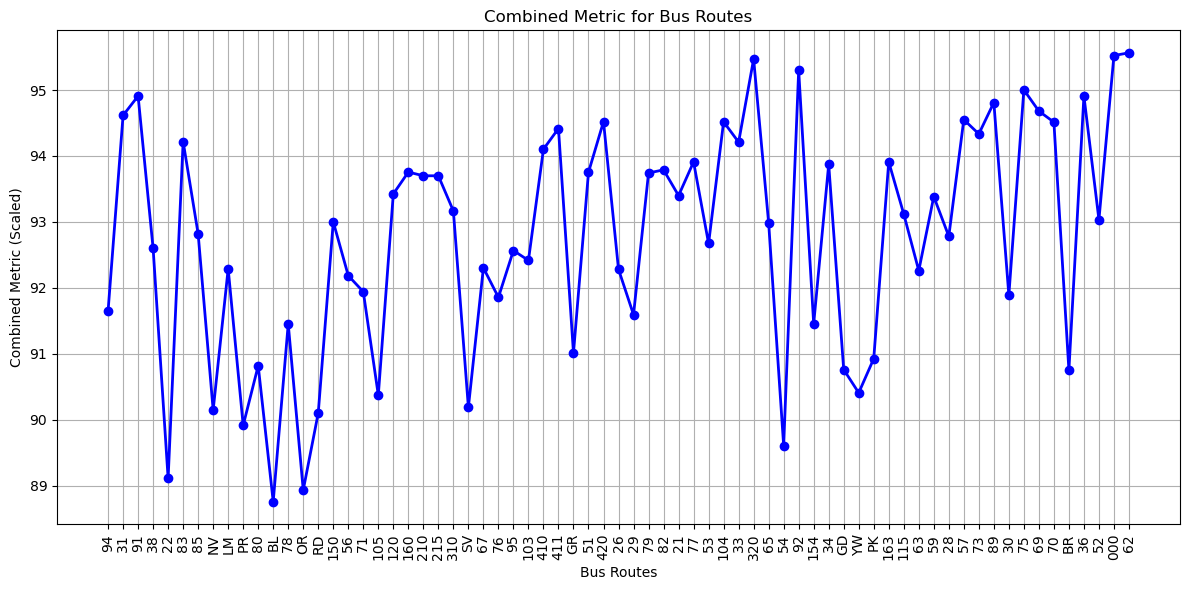

In [173]:
import matplotlib.pyplot as plt

# Ensure the lists are correctly sliced to exclude the last 4 elements
route_names_filtered = route_names[:-4]
all_rider_ptg_values_filtered = all_rider_ptg_values[:-4]
coverage_percentages_filtered = coverage_percentages[:-4]

# Calculate the y-values using the provided formula
y_values = [(rider_ptg * 100 * 0.7) + (coverage * 0.3) 
            for rider_ptg, coverage in zip(all_rider_ptg_values_filtered, coverage_percentages_filtered)]

# Create the linear plot
plt.figure(figsize=(12, 6))
plt.plot(route_names_filtered, y_values, marker='o', color='b', linestyle='-', linewidth=2)

# Set the plot title and labels
plt.title("Combined Metric for Bus Routes")
plt.xlabel("Bus Routes")
plt.ylabel("Combined Metric (Scaled)")

# Rotate the route names for better visibility
plt.xticks(rotation=90)

# Display the grid for better readability
plt.grid(True)

# Tight layout for neatness
plt.tight_layout()

# Show the plot
plt.show()
